In [1]:
import nltk
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the IMDb dataset
dataset = load_dataset("imdb")

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /home/nivedita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nivedita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nivedita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 # Visualize the Length of Reviews
Next, let's visualize the distribution of the lengths of the reviews (number of words after preprocessing).

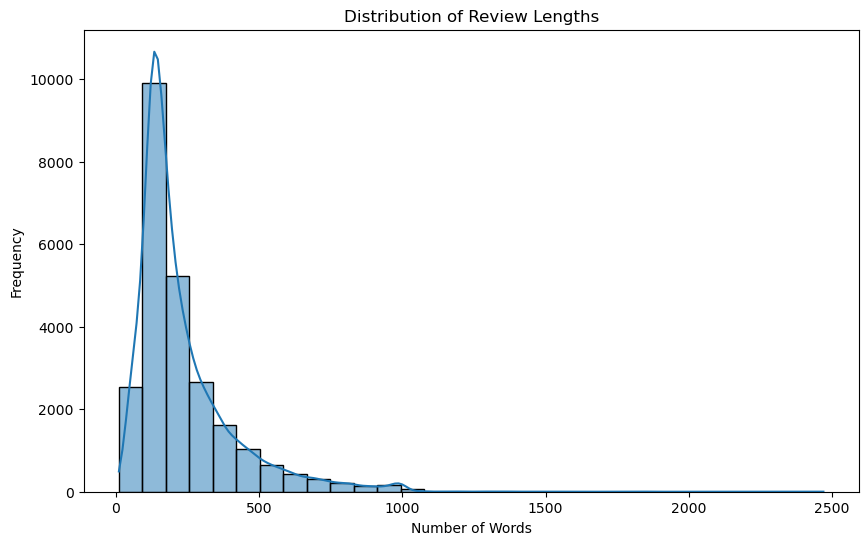

In [2]:
# Calculate the length of each review
review_lengths = [len(text.split()) for text in dataset['train']['text']]

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


# Visualize Word Cloud of the Most Frequent Words
We can also create a word cloud to visualize the most frequent words in the reviews.

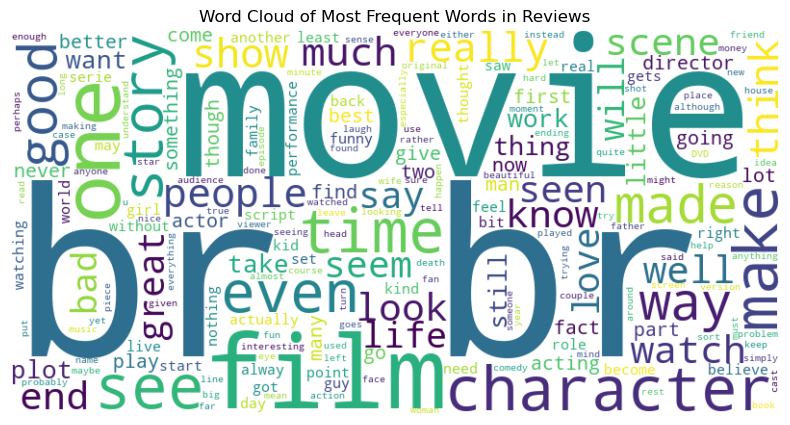

In [3]:
from wordcloud import WordCloud

# Join all the reviews into one large string
all_text = " ".join(dataset['train']['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Reviews")
plt.show()


# Visualize Word Cloud of the Most Frequent Words
We can also create a word cloud to visualize the most frequent words in the reviews.

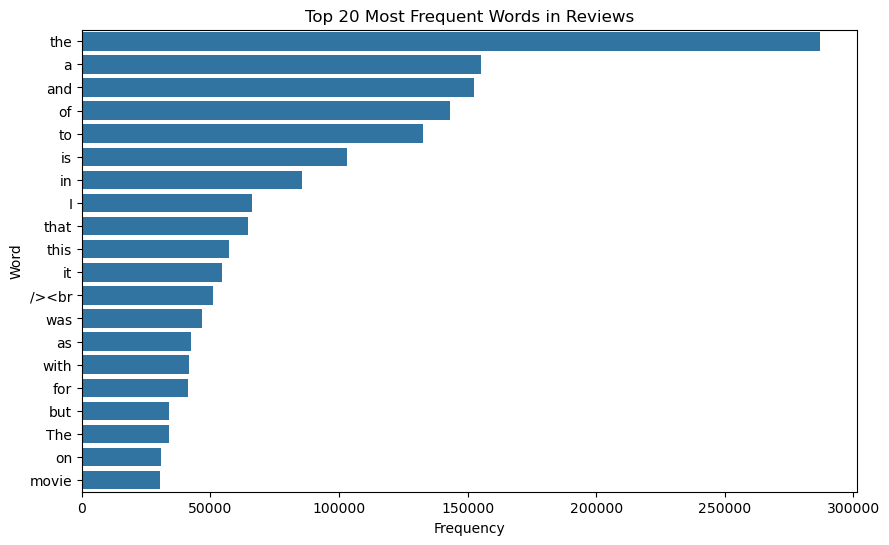

In [4]:
from collections import Counter

# Count the frequency of each word in the dataset
word_counts = Counter(" ".join(dataset['train']['text']).split())

# Get the top N most common words
top_n = 20
common_words = word_counts.most_common(top_n)
words, counts = zip(*common_words)

# Plot the top N most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title(f"Top {top_n} Most Frequent Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


In [5]:
# Function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(tokens)


In [6]:
# Apply preprocessing to the dataset
dataset = dataset.map(lambda x: {'text': preprocess_text(x['text'])})

# Extract features and labels
texts = dataset['train']['text']
labels = dataset['train']['label']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(texts)
y = labels

In [7]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [9]:
# Make predictions
y_pred = model.predict(X_test)


In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2515
           1       0.86      0.86      0.86      2485

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



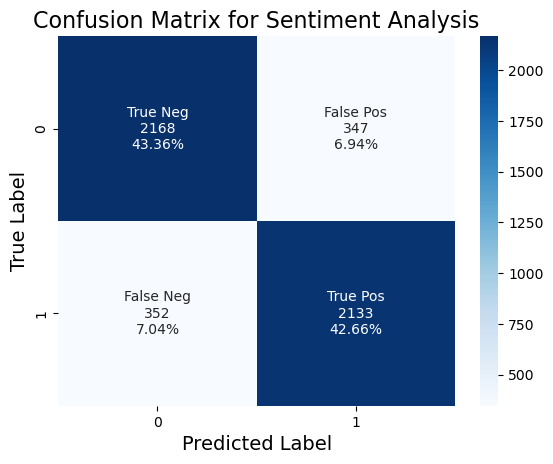

In [12]:
import numpy as np

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Add labels and a title
plt.title('Confusion Matrix for Sentiment Analysis', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the plot
plt.show()